# ELE435-535 Computational LAB 10

# LAB Parts:

## 1) TensorFlow Installation
## 2) Implementing a multi-layer perceptron with TensorFlow
## 3) Having fun with TensorFlow Playground

### 1) TensorFlow Installation

TensorFlow is a free and an open source software library for numerical computation using data flow graphs. It was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research. However, it's applicable in a
wide variety of other domains as well.

1. Install Anaconda by following the instructions here https://www.anaconda.com/download. This should work for all MAC, Linux and Windows operating systems.
2. Open your Anaconda terminal and create a new environment called tensorflow using the following command: <br> conda create -n tensorflow python=3.6 <br>
3. Now, activate your tensorflow environment by typing <br> source activate tensorflow (MAC and Linux) <br> activate tensorflow (Windows) <br>
4. Once the new envoironment is activated, we are going to install the following packages:<br> conda install ipython <br> conda install jupyter <br> conda install matplotlib <br> conda install -c conda-forge tensorflow 

### 2) Implementing a MLP with TensorFlow

There are many well-written tutorials on how to use TensorFlow. For example, see: https://www.tensorflow.org/guide/low_level_intro <br> https://www.datacamp.com/community/tutorials/tensorflow-tutorial <br>
Further, these days high-level APIs such as Keras has made it very easy to train very deep neural networks. For example, simply with 4-5 lines of code with Keras running on top of TensorFlow (https://www.tensorflow.org/tutorials/), you can get more than 99% test accuracy on MNIST. However, to understand the underlying flow better, we are going to work with the low-level back-end.

Here's a simple code that trains a one layer neural network with linear activation function. We use Cross-entropy as the loss function and SGD for learning the model.

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
## Building the graph

num_hidden_neurons=64
learning_rate = 0.1
num_steps = 10000
batch_size = 64

X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])
weights = {
    'h1': tf.Variable(tf.random_normal([784, num_hidden_neurons])),
    'out': tf.Variable(tf.random_normal([num_hidden_neurons, 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([num_hidden_neurons])),
    'out': tf.Variable(tf.random_normal([10]))
}
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(0, num_steps):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % 1000 == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")

    print("Test acc=",str(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})), "%")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

step 0, training loss= 70.29067, training acc= 21.875%
step 1000, training loss= 0.044581283, training acc= 98.4375%
step 2000, training loss= 0.10869244, training acc= 96.875%
step 3000, training loss= 0.43076664, training acc= 93.75%
step 4000, training loss= 0.20707709, training acc= 98.4375%
step 5000, training loss= 0.02388611, training acc= 100.0%
step 6000, training loss= 0.056399062, training acc= 98.4375%
step 7000, training loss= 0.022255301, training acc= 100.0%
step 8000, training loss= 0.17430496, training acc= 92.1875%
step 9000, training loss= 0.024185589, training acc= 100.0%
Test acc= 89.22 %


1) Increase the number of neurons in the hidden layer to 128, 256, 512 and 1024. Plot the training loss and test accuracy vs the number of neurons (in two separate plots).

#### Using Linear Activation

In [22]:
## Building the graph
hid_neuron = [128, 256, 512, 1024]
num_steps = 10000
batch_size = 64
train_losses = []
test_acc = []
for h in hid_neuron:
    num_hidden_neurons=h
    learning_rate = 0.1


    X = tf.placeholder("float", [None, 784])
    Y = tf.placeholder("float", [None, 10])
    weights = {
        'h1': tf.Variable(tf.random_normal([784, num_hidden_neurons])),
        'out': tf.Variable(tf.random_normal([num_hidden_neurons, 10]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([num_hidden_neurons])),
        'out': tf.Variable(tf.random_normal([10]))
    }
    def neural_net(x):
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
#         layer_1 = tf.nn.relu(layer_1)
        out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
        return out_layer

    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss)
    correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    ### Initialization and running the model
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for step in range(0, num_steps):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % 1000 == 0:
                train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
        this_test_acc = sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})
        test_acc.append(this_test_acc)
        train_losses.append(train_loss)
        print("Test acc=",str(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})), "%")
        print("="*50)

step 0, training loss= 85.50122, training acc= 28.125%
step 1000, training loss= 1.2586066, training acc= 90.625%
step 2000, training loss= 0.245331, training acc= 96.875%
step 3000, training loss= 0.060221016, training acc= 98.4375%
step 4000, training loss= 0.15330584, training acc= 98.4375%
step 5000, training loss= 0.4842568, training acc= 92.1875%
step 6000, training loss= 0.20132288, training acc= 96.875%
step 7000, training loss= 0.051364806, training acc= 98.4375%
step 8000, training loss= 0.025713691, training acc= 100.0%
step 9000, training loss= 0.0048648366, training acc= 100.0%
Test acc= 88.020004 %
step 0, training loss= 147.56612, training acc= 29.6875%
step 1000, training loss= 1.5725528, training acc= 95.3125%
step 2000, training loss= 0.65793234, training acc= 98.4375%
step 3000, training loss= 0.7999196, training acc= 89.0625%
step 4000, training loss= 0.3910125, training acc= 93.75%
step 5000, training loss= 0.6504918, training acc= 93.75%
step 6000, training loss= 

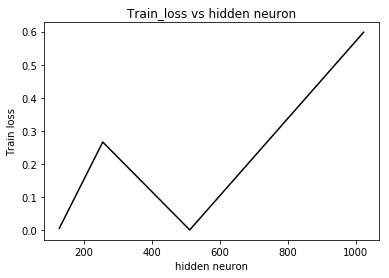

In [23]:
plt.plot(hid_neuron, train_losses, 'k-')
plt.xlabel('hidden neuron')
plt.ylabel('Train loss')
plt.title('Train_loss vs hidden neuron')
plt.show()

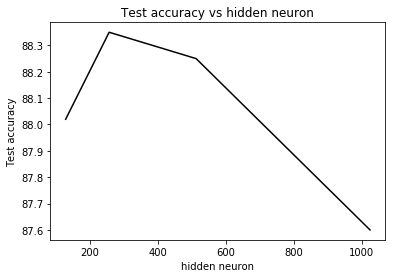

In [24]:
plt.plot(hid_neuron, test_acc, 'k-')
plt.xlabel('hidden neuron')
plt.ylabel('Test accuracy')
plt.title('Test accuracy vs hidden neuron')
plt.show()

##### Using Relu Activation

In [5]:
## Building the graph
hid_neuron = [128, 256, 512, 1024]
num_steps = 10000
batch_size = 64
train_losses = []
test_acc = []
for h in hid_neuron:
    num_hidden_neurons=h
    learning_rate = 0.1


    X = tf.placeholder("float", [None, 784])
    Y = tf.placeholder("float", [None, 10])
    weights = {
        'h1': tf.Variable(tf.random_normal([784, num_hidden_neurons])),
        'out': tf.Variable(tf.random_normal([num_hidden_neurons, 10]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([num_hidden_neurons])),
        'out': tf.Variable(tf.random_normal([10]))
    }
    def neural_net(x):
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)
        out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
        return out_layer

    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss)
    correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    ### Initialization and running the model
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for step in range(0, num_steps):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % 1000 == 0:
                train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
        this_test_acc = sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})
        test_acc.append(this_test_acc)
        train_losses.append(train_loss)
        print("Test acc=",str(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})), "%")
        print("="*50)

step 0, training loss= 58.53575, training acc= 29.6875%
step 1000, training loss= 0.3709979, training acc= 93.75%
step 2000, training loss= 0.1489338, training acc= 95.3125%
step 3000, training loss= 0.42726046, training acc= 92.1875%
step 4000, training loss= 0.24713716, training acc= 93.75%
step 5000, training loss= 0.24031404, training acc= 96.875%
step 6000, training loss= 0.21713138, training acc= 93.75%
step 7000, training loss= 0.063854076, training acc= 98.4375%
step 8000, training loss= 0.071200944, training acc= 98.4375%
step 9000, training loss= 0.01822501, training acc= 100.0%
Test acc= 92.72 %
step 0, training loss= 87.995544, training acc= 15.625%
step 1000, training loss= 2.3018434, training acc= 93.75%
step 2000, training loss= 0.00980527, training acc= 100.0%
step 3000, training loss= 0.00078797166, training acc= 100.0%
step 4000, training loss= 0.04829496, training acc= 96.875%
step 5000, training loss= 0.0011190504, training acc= 100.0%
step 6000, training loss= 0.01

In [6]:
train_losses

[0.01822501, 0.0019371236, 0.000200043, 0.0]

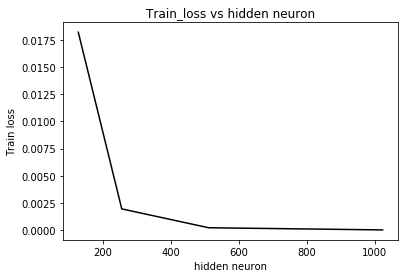

In [7]:
plt.plot(hid_neuron, train_losses, 'k-')
plt.xlabel('hidden neuron')
plt.ylabel('Train loss')
plt.title('Train_loss vs hidden neuron')
plt.show()

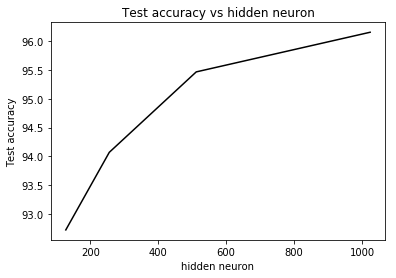

In [8]:
plt.plot(hid_neuron, test_acc, 'k-')
plt.xlabel('hidden neuron')
plt.ylabel('Test accuracy')
plt.title('Test accuracy vs hidden neuron')
plt.show()

##### Using sigmoid activation function

In [5]:
## Building the graph
hid_neuron = [128, 256, 512, 1024]
num_steps = 10000
batch_size = 64
train_losses = []
test_acc = []
for h in hid_neuron:
    num_hidden_neurons=h
    learning_rate = 0.1


    X = tf.placeholder("float", [None, 784])
    Y = tf.placeholder("float", [None, 10])
    weights = {
        'h1': tf.Variable(tf.random_normal([784, num_hidden_neurons])),
        'out': tf.Variable(tf.random_normal([num_hidden_neurons, 10]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([num_hidden_neurons])),
        'out': tf.Variable(tf.random_normal([10]))
    }
    def neural_net(x):
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.sigmoid(layer_1)
        out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
        return out_layer

    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss)
    correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    ### Initialization and running the model
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for step in range(0, num_steps):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % 1000 == 0:
                train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
        this_test_acc = sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})
        test_acc.append(this_test_acc)
        train_losses.append(train_loss)
        print("Test acc=",str(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})), "%")
        print("="*50)

step 0, training loss= 11.754271, training acc= 7.8125%
step 1000, training loss= 0.5024231, training acc= 81.25%
step 2000, training loss= 0.53339285, training acc= 78.125%
step 3000, training loss= 0.7263667, training acc= 81.25%
step 4000, training loss= 0.17920521, training acc= 92.1875%
step 5000, training loss= 0.1850318, training acc= 93.75%
step 6000, training loss= 0.27878964, training acc= 90.625%
step 7000, training loss= 0.3488502, training acc= 87.5%
step 8000, training loss= 0.33271682, training acc= 90.625%
step 9000, training loss= 0.21924496, training acc= 93.75%
Test acc= 90.76 %
step 0, training loss= 14.850653, training acc= 9.375%
step 1000, training loss= 0.88102746, training acc= 84.375%
step 2000, training loss= 0.21092185, training acc= 90.625%
step 3000, training loss= 0.19666657, training acc= 95.3125%
step 4000, training loss= 0.8329684, training acc= 85.9375%
step 5000, training loss= 0.5321032, training acc= 89.0625%
step 6000, training loss= 0.38727552, t

In [6]:
train_losses

[0.21924496, 0.12843527, 0.13024324, 0.029038545]

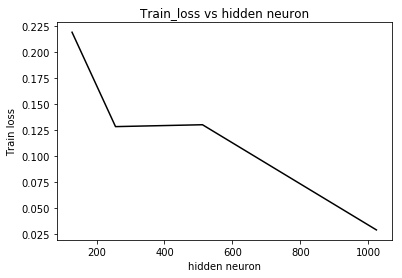

In [7]:
plt.plot(hid_neuron, train_losses, 'k-')
plt.xlabel('hidden neuron')
plt.ylabel('Train loss')
plt.title('Train_loss vs hidden neuron')
plt.show()

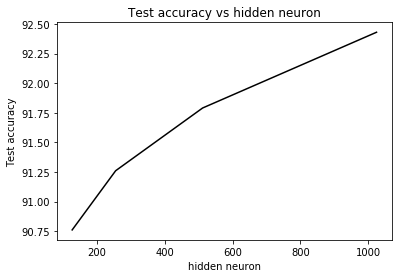

In [8]:
plt.plot(hid_neuron, test_acc, 'k-')
plt.xlabel('hidden neuron')
plt.ylabel('Test accuracy')
plt.title('Test accuracy vs hidden neuron')
plt.show()

2) Inspired by the code above, train a MLP with 3 layers, the first layer with 64, the second layer with 128 and the final hidden layer with 256 neurons, respectively. Report the training and test accuracies.

In [25]:
## Building the graph
hid_neuron_in_layer = [64, 128, 256]
num_steps = 10000
batch_size = 64
train_losses = []
test_acc = []
learning_rate = 0.1

X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])
weights = {
    'h1': tf.Variable(tf.random_normal([784, hid_neuron_in_layer[0]])),
    'h2': tf.Variable(tf.random_normal([hid_neuron_in_layer[0], hid_neuron_in_layer[1]])),
    'h3': tf.Variable(tf.random_normal([hid_neuron_in_layer[1], hid_neuron_in_layer[2]])),
    'out': tf.Variable(tf.random_normal([hid_neuron_in_layer[2], 10]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([hid_neuron_in_layer[0]])),
    'b2': tf.Variable(tf.random_normal([hid_neuron_in_layer[1]])),
    'b3': tf.Variable(tf.random_normal([hid_neuron_in_layer[2]])),
    'out': tf.Variable(tf.random_normal([10]))
}
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Initialization and running the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(0, num_steps):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % 1000 == 0:
            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
            print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
    this_test_acc = sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})
    test_acc.append(this_test_acc)
    train_losses.append(train_loss)
    print("Test acc=",str(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})), "%")
    print("="*50)

step 0, training loss= 12.150507, training acc= 12.5%
step 1000, training loss= 0.41335088, training acc= 89.0625%
step 2000, training loss= 0.36334664, training acc= 81.25%
step 3000, training loss= 0.4254576, training acc= 87.5%
step 4000, training loss= 0.24153888, training acc= 96.875%
step 5000, training loss= 0.20508175, training acc= 95.3125%
step 6000, training loss= 0.22992617, training acc= 92.1875%
step 7000, training loss= 0.26014394, training acc= 92.1875%
step 8000, training loss= 0.20872627, training acc= 93.75%
step 9000, training loss= 0.16023499, training acc= 96.875%
Test acc= 90.59 %


#### Train accuracy is 96.875% and Test accuracy is 90.59% 

3) Plot the training / test accuracy for when learning rate is {100, 10, 1, 0.1, 0.01, and 0.001}. Interpret the results.

In [11]:
lr = [.001, .01, .1, 1, 10, 100]
## Building the graph
hid_neuron_in_layer = [64, 128, 256]
num_steps = 10000
batch_size = 64
train_accuracy = []
test_acc = []
for l in lr:
    learning_rate = l

    X = tf.placeholder("float", [None, 784])
    Y = tf.placeholder("float", [None, 10])
    weights = {
        'h1': tf.Variable(tf.random_normal([784, hid_neuron_in_layer[0]])),
        'h2': tf.Variable(tf.random_normal([hid_neuron_in_layer[0], hid_neuron_in_layer[1]])),
        'h3': tf.Variable(tf.random_normal([hid_neuron_in_layer[1], hid_neuron_in_layer[2]])),
        'out': tf.Variable(tf.random_normal([hid_neuron_in_layer[2], 10]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hid_neuron_in_layer[0]])),
        'b2': tf.Variable(tf.random_normal([hid_neuron_in_layer[1]])),
        'b3': tf.Variable(tf.random_normal([hid_neuron_in_layer[2]])),
        'out': tf.Variable(tf.random_normal([10]))
    }
    def neural_net(x):
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.sigmoid(layer_1)
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.sigmoid(layer_2)
        layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
        layer_3 = tf.nn.sigmoid(layer_3)
        out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
        return out_layer

    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_net(X), labels=Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss)
    correct_pred = tf.equal(tf.argmax(neural_net(X), 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    ### Initialization and running the model
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for step in range(0, num_steps):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            if step % 1000 == 0:
                train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: batch_x,Y: batch_y})
                print("step " + str(step) + ", training loss= " + str(train_loss) +", training acc= "+str(train_acc*100)+"%")
        this_test_acc = sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})
        test_acc.append(this_test_acc)
        train_accuracy.append(train_acc)
        print("Test acc=",str(sess.run(accuracy*100, feed_dict={X: mnist.test.images,Y: mnist.test.labels})), "%")
        print("="*50)

step 0, training loss= 10.909701, training acc= 6.25%
step 1000, training loss= 5.312002, training acc= 10.9375%
step 2000, training loss= 3.564157, training acc= 20.3125%
step 3000, training loss= 3.7913523, training acc= 18.75%
step 4000, training loss= 2.792764, training acc= 34.375%
step 5000, training loss= 2.107071, training acc= 46.875%
step 6000, training loss= 2.546255, training acc= 35.9375%
step 7000, training loss= 1.8896507, training acc= 40.625%
step 8000, training loss= 1.5763865, training acc= 54.6875%
step 9000, training loss= 2.040928, training acc= 42.1875%
Test acc= 49.03 %
step 0, training loss= 20.841478, training acc= 7.8125%
step 1000, training loss= 1.8860003, training acc= 51.5625%
step 2000, training loss= 1.3344455, training acc= 56.25%
step 3000, training loss= 0.8789431, training acc= 71.875%
step 4000, training loss= 1.257575, training acc= 65.625%
step 5000, training loss= 0.69591045, training acc= 81.25%
step 6000, training loss= 0.79009235, training ac

In [20]:
train_accuracy

[0.421875, 0.84375, 0.984375, 0.984375, 0.0625, 0.171875]

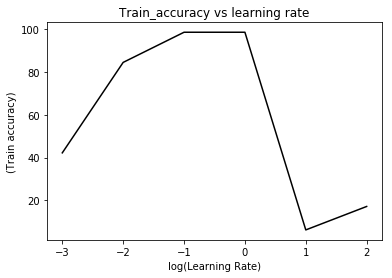

In [21]:
plt.plot(np.log10(lr), (100*(np.array(train_accuracy)) ), 'k-')
plt.xlabel('log(Learning Rate)')
plt.ylabel('(Train accuracy)')
plt.title('Train_accuracy vs learning rate')
plt.show()

In [13]:
train_accuracy

[0.421875, 0.84375, 0.984375, 0.984375, 0.0625, 0.171875]

In [14]:
lr

[0.001, 0.01, 0.1, 1, 10, 100]

In [15]:
test_acc

[49.03, 78.33, 91.18, 94.67, 10.1, 9.8]

####  For low values of learning rates, training is slow therefore it will require more iterations to fit the the training set while for high learning rate , train loss increases while train accuracy decreases indicating the model is unable to fit the training set well. This happens because gradient descent is not able to find minima due to large step size.
#### For the given number of iterations, learning rate of 1 has the best performance.

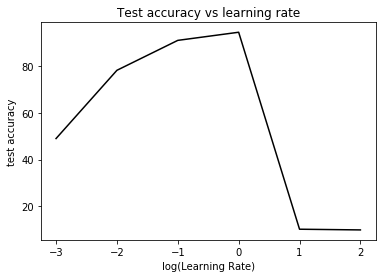

In [17]:
plt.plot(np.log10(lr), test_acc, 'k-')
plt.xlabel('log(Learning Rate)')
plt.ylabel('test accuracy')
plt.title('Test accuracy vs learning rate')
plt.show()

#### As learning rate increases, train loss decreases indicating the model is able to fit to the training data set well and generalize to the test set leading to an increase in accuracy. For high learning rates, gradient descent is not able to find minima leading  high train loss and low accuracy for train set and hence the test set.

### 3) Having fun with TensorFlow Playground:

Please visit the following link:
    http://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=regplane&learningRate=1&regularizationRate=0&noise=0&networkShape=&seed=0.93547&showTestData=false&discretize=false&percTrainData=50&x=true&y=false&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
        

#### For the Circle DATASET:
1) Pick the number of hidden layers to be zero. Set the learning rate to be 0.01. Leave all other parameters to their default values. Now, based on the distribution of data, can one single feature out of the available options classify all training data correctly? If so, explain which one and why? If you are only allowed to hand-pick one feature, which one would you pick?

#### A single feature will not be able to classify all the trainng data correctly as none of the features is able to separate the data. Picking up either x1^2 or x2^2 would give the best accuracy as it is able to separate significant amount of data

2) Now, select only the feature x1 (no other features should be selected). Set the learning rate to be 0.01 and train the network. Report the training and test loss? Repeat this for learning rate of 0.03, 0.1, 0.3, 1, 3 and 10, respectively, and explain what happens as you increase the learning rate.

##### lr = 0.01; Train Loss = .499, Test Loss = .499
##### lr = 0.03; Train Loss = .499, Test Loss = .499
##### lr = 0.1; Train Loss = .516, Test Loss = .523
##### lr = 0.3; Train Loss = .564, Test Loss = .583
##### lr = 1; Train Loss = .611, Test Loss = .633 (oscillation observed)
##### lr = 3; Train Loss = .667, Test Loss = .698 (oscillation observed)
##### lr = 10; Train Loss = .680, Test Loss = .704  (oscillation observed)

#### For low learning rates, train and test loss stabilize to same value of 0.5. This is expected as with x1 feature prediction is as good as random guess. As learning rate is increased, train and test loss increase and oscillations are observed due to gradient descent not converging because of large step size


3) Pick only x1 feature. Now, add one hidden layer with two neurons. Set the learning rate to be 0.1 and Activation to be "ReLU". Train the network. What training/test loss can you achieve? Repeat this for "Tanh", "Sigmoid" and "Linear". Which activation performs the best? Which one performs the worst? why?

###### Activation - ReLU => Train Loss = .264, Test Loss = .297
###### Activation - Tanh => Train Loss = .261, Test Loss = .279
###### Activation - Sigmoid => Train Loss = .260, Test Loss = .280
###### Activation - Linear => Train Loss = .5, Test Loss = .5

###### Tanh performs the best while linear activation performs the worst based on the values for test loss. Linear is expected to have the worst behavior as it does not have any non linearlity and therefore additional layers are of no use as it is not able to learn non linear features. Tanh performs the best  as it adds non linearity for both positive and negative inputs whereas ReLU and Sigmoid only passes positive values.

4) Now, pick the activation to be "sigmoid" and train your network for more than 600 epochs. Report the final values of weights in the network. Then, pick the regularization to be "L2". Set the regularization rate to be "0.1". How does the training/test loss change? How about the final value of the learned weights? Repeat the same thing for "L1" regularizer and explain how the weights, training and test loss change.

##### Sigmoid without Regularization: Weights from input to hidden are -1.2, -2 and weights from hidden to output are 2.9, 3.1. Train Loss = .261, Test Loss = .282

##### Sigmoid with L2 Regularization: Weights from input to hidden are -.0028, -0028 and weights from hidden to output are -.0058, -.0059. Train Loss = .5, Test Loss = .5 
##### As the regularization rate is high, there is a tradeoff in the objective function and it is not able to assign high weights and these weights are not sufficent to learn the dataset. Train and test loss both increase. 

##### Sigmoid with L1 Regularization: Weights from input to hidden are 0, 0 and weights from hidden to output are 0, 0. Train Loss = .5, Test Loss = .5
##### As the regularization rate is high, there is a tradeoff in the objective function and sparsity. In this case the model produces a sparse solution and assigns 0 weights. Train and test loss stays same as with L2 regularization and are higher than without regularization.

5) Pick only "x1" feature and set the activation to be "sigmoid". Set the "Regularization" to be "None". Now, increase the number of neurons in your hidden layer from 2 to 8. Does increasing the number of parameters (e.g., having more neurons) help with generalization? If so, how much improvement can you acheive?

##### Hidden Layes = 2, train loss = .260, test loss = .281
##### Hidden Layes = 3, train loss = .260, test loss = .282
##### Hidden Layes = 4, train loss = .259, test loss = .283
##### Hidden Layes = 5, train loss = .260, test loss = .283
##### Hidden Layes = 6, train loss = .259, test loss = .282
##### Hidden Layes = 7, train loss = .259, test loss = .282
##### Hidden Layes = 8, train loss = .260, test loss = .283

##### Increasing number of neurons, does not help much in generalization. This indicates features extracted in hidden layer with just one input feature is not sufficient to further improve the accuracy.

6) Now, increase the number of hidden layers to two, each with 8 neurons. Report the training/test loss after convergence. Does this help with generalization?

#### Train Loss: 0.259, Test Loss: 0.280. This also doesn't help with generalization.

7) Now you are free to choose any training setup you want (e.g., the network width and depth, learning rate, activation function, regularization, etc.) but your network cannot have more than 6 weights in total. Construct a network that can achieve 0 training loss. Explain your setup and copy the url of the network you constructed (just copy-past the url of web-page you are at).

#### Setup: Choose x1^2 and x2^2 features so that data becomes separable. Use single hidden layer with 1 neuron which connects to output.  Loss goes to zero after ~1500 epochs. 
#### Tanh activation was used so it passes both positive and negative values along with L1 regularization so as to generalize to test data (although this may not be needed as we are minimizing train loss).

http://playground.tensorflow.org/#activation=tanh&regularization=L1&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0.001&noise=0&networkShape=1&seed=0.93547&showTestData=false&discretize=false&percTrainData=50&x=false&y=false&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

#### For XOR, Gaussian and Spiral Datasets:


8) Repeat part 7 for the XOR dataset when the total number of weights is less than or equal to 4.

##### Features used: X1X2, sin(X1), sin(X2). No regularization was used as we have to minimize training loss and not test loss. The network thus has 3 input layers, one hidden layer. 
#### Tanh activation was used so it passes both positive and negative values. It requires about 6800 epochs for train loss to go to 0.

http://playground.tensorflow.org/#activation=tanh&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=1&seed=0.41923&showTestData=false&discretize=false&percTrainData=50&x=false&y=false&xTimesY=true&xSquared=false&ySquared=false&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false

9) Repeat part 7 for the Gaussian dataset when the total number of weights is less than or equal to 2.

http://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=1&seed=0.27330&showTestData=false&discretize=false&percTrainData=50&x=false&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

##### As the data is linearly separable, no activation function was used. X2 feature was used as it separates the data. Train and test loss go to 0 in 100 iterations with learning rate of 0.1.

10) Repeat part 7 for the Spiral dataset when the total number of weights is less than or equal to 48. Any training loss less than 0.005 is accepted.

#### For input layer, all the given features were used followed by 6 neurons in the hidden layer and finally the output layer. Train loss was found to go to .005 in ~4000 epochs. No regularization was used so as to get a low train loss. Test loss was .001. Learning rate was initally set to .1 for faster learning but was eventually reduced to .001.

http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.003&regularizationRate=0&noise=0&networkShape=6&seed=0.14286&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false